In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms

C:\Users\ldaou\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df = pd.read_csv('interactions.tsv', sep = '\t')
df

,gene_name,gene_claim_name,entrez_id,interaction_claim_source,interaction_types,drug_claim_name,drug_claim_primary_name,drug_name,drug_concept_id,interaction_group_score,PMIDs
0,CDK7,CDK7,1022.0,CancerCommons,inhibitor,SNS-032,SNS-032,BMS-387032,chembl:CHEMBL296468,0.82,NaN
1,VDR,VDR,7421.0,DTC,NaN,NIFEKALANT,NIFEKALANT,NIFEKALANT,chembl:CHEMBL360861,0.14,NaN
2,GPR55,GPR55,9290.0,DTC,NaN,BISACODYL,BISACODYL,BISACODYL,chembl:CHEMBL942,0.94,NaN
3,NR1H4,NR1H4,9971.0,DTC,NaN,PENTACHLOROPHENOL,PENTACHLOROPHENOL,PENTACHLOROPHENOL,chembl:CHEMBL75967,0.07,NaN
4,FGFR2,FGFR2,2263.0,JAX-CKB,NaN,AZ6089,AZ6089,NaN,NaN,NaN,22869148
...,...,...,...,...,...,...,...,...,...,...,...
85455,PIK3C3,PIK3C3,5289.0,MyCancerGenome,inhibitor,BGJ398,BGJ398,INFIGRATINIB,chembl:CHEMBL1852688,0.17,NaN
85456,ABL1,Tyrosine-protein kinase ABL1,25.0,TTD,NaN,Azaindole derivative 2,Azaindole derivative 2,NaN,NaN,NaN,NaN
85457,CACNA1D,776,776.0,GuideToPharmacology,inhibitor,135651166,[3H](+)-ISRADIPINE,NaN,NaN,NaN,NaN
85458,PRKCA,PRKCA,5578.0,DTC,NaN,RESVERATROL,RESVERATROL,RESVERATROL,chembl:CHEMBL165,0.12,21880495


In [3]:
newDF = df[['gene_name','drug_name','interaction_group_score']]
newDF

,gene_name,drug_name,interaction_group_score
0,CDK7,BMS-387032,0.82
1,VDR,NIFEKALANT,0.14
2,GPR55,BISACODYL,0.94
3,NR1H4,PENTACHLOROPHENOL,0.07
4,FGFR2,NaN,NaN
...,...,...,...
85455,PIK3C3,INFIGRATINIB,0.17
85456,ABL1,NaN,NaN
85457,CACNA1D,NaN,NaN
85458,PRKCA,RESVERATROL,0.12


In [4]:
newDF['gene_name'].isnull().sum()

3124

In [5]:
dataframe = newDF.dropna()
dataframe

,gene_name,drug_name,interaction_group_score
0,CDK7,BMS-387032,0.82
1,VDR,NIFEKALANT,0.14
2,GPR55,BISACODYL,0.94
3,NR1H4,PENTACHLOROPHENOL,0.07
5,APOE,PREDNISONE,0.23
...,...,...,...
85449,CSF1R,CHEMBL541400,0.03
85452,CDK8,CHEMBL546797,0.09
85455,PIK3C3,INFIGRATINIB,0.17
85458,PRKCA,RESVERATROL,0.12


In [6]:
dataframe['drug_name'].isnull().sum()

0

In [7]:
dataframe['gene_name'].isnull().sum()

0

In [8]:
dataframe['interaction_group_score'].isnull().sum()

0

In [9]:
#dataframe.groupby('gene_name')

In [10]:
dataframe.sort_values('gene_name')

,gene_name,drug_name,interaction_group_score
84253,A2M,THROMBIN,5.30
19794,AAK1,BARICITINIB,7.96
46335,AANAT,FLUOXETINE,1.41
50157,AANAT,MELATONIN,3.14
47878,AANAT,ISOPROTERENOL,1.46
...,...,...,...
70908,ZNF565,METHYLPHENIDATE,2.83
58879,ZNF804A,LITHIUM,2.77
15107,ZSCAN25,LOPINAVIR,2.36
78255,ZSCAN25,TACROLIMUS,1.87


In [11]:
G = nx.from_pandas_edgelist(dataframe[:30], source='gene_name', target='drug_name',edge_attr= 'interaction_group_score')

In [12]:
# Give the graph a name
G.name = 'Drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Drug Interactions Network' with 60 nodes and 30 edges
Network density: 0.01694915254237288


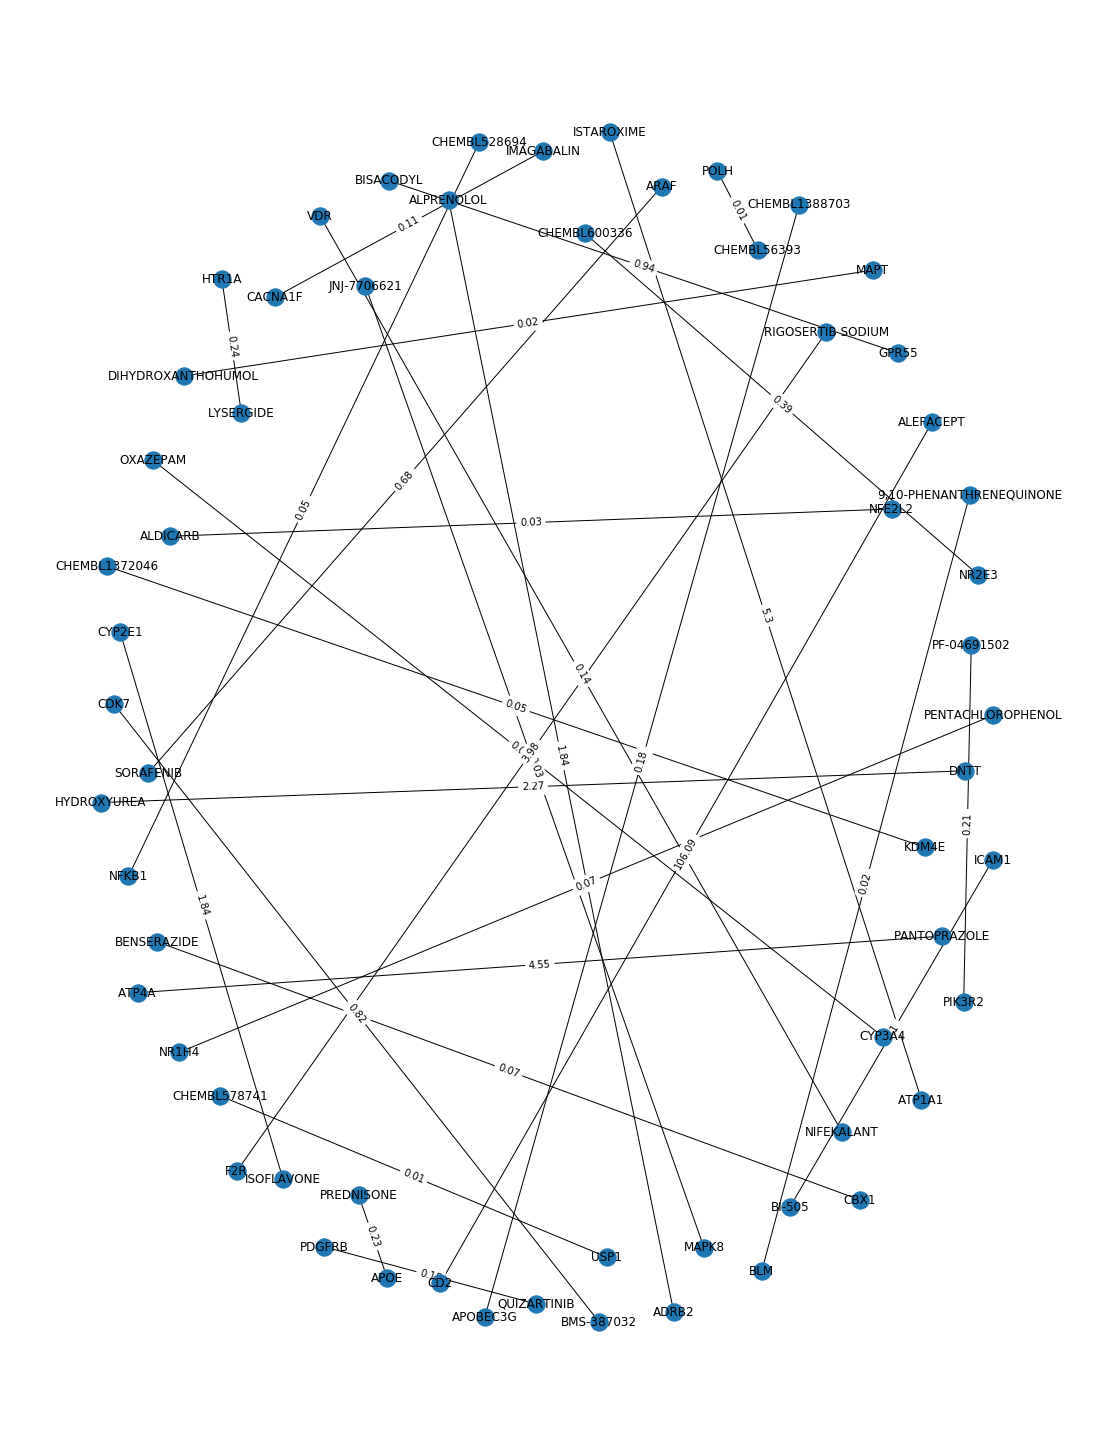

In [13]:
figure(figsize=(15, 20))
pos = nx.spring_layout(G, k=10)  # For better example looking
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['interaction_group_score'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [14]:
Newdf2 = pd.read_csv('curated_gene_disease_associations.tsv', sep = '\t')

In [15]:
Newdf2

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [16]:
newDF2 = Newdf2[['geneSymbol','diseaseName','score']]
newDF2

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [17]:
newDF2['geneSymbol'].isnull().sum()

0

In [18]:
dataf = newDF2.dropna()
dataf

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [19]:
dataf.sort_values('geneSymbol')

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
27,A2M,alpha-2-Macroglobulin Deficiency,0.31
26,A2M,Acute kidney injury,0.30
25,A2M,Liver carcinoma,0.51
...,...,...,...
80925,ZSWIM9,Sclerocystic Ovaries,0.30
59639,ZW10,Osteosarcoma,0.31
71089,ZWILCH,Weight Gain,0.30
64420,ZWINT,Liver carcinoma,0.31


In [20]:
G = nx.from_pandas_edgelist(dataf[:30], source='geneSymbol', target='diseaseName',edge_attr= 'score')

In [21]:
# Give the graph a name
G.name = 'Disease Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Disease Interactions Network' with 33 nodes and 30 edges
Network density: 0.056818181818181816


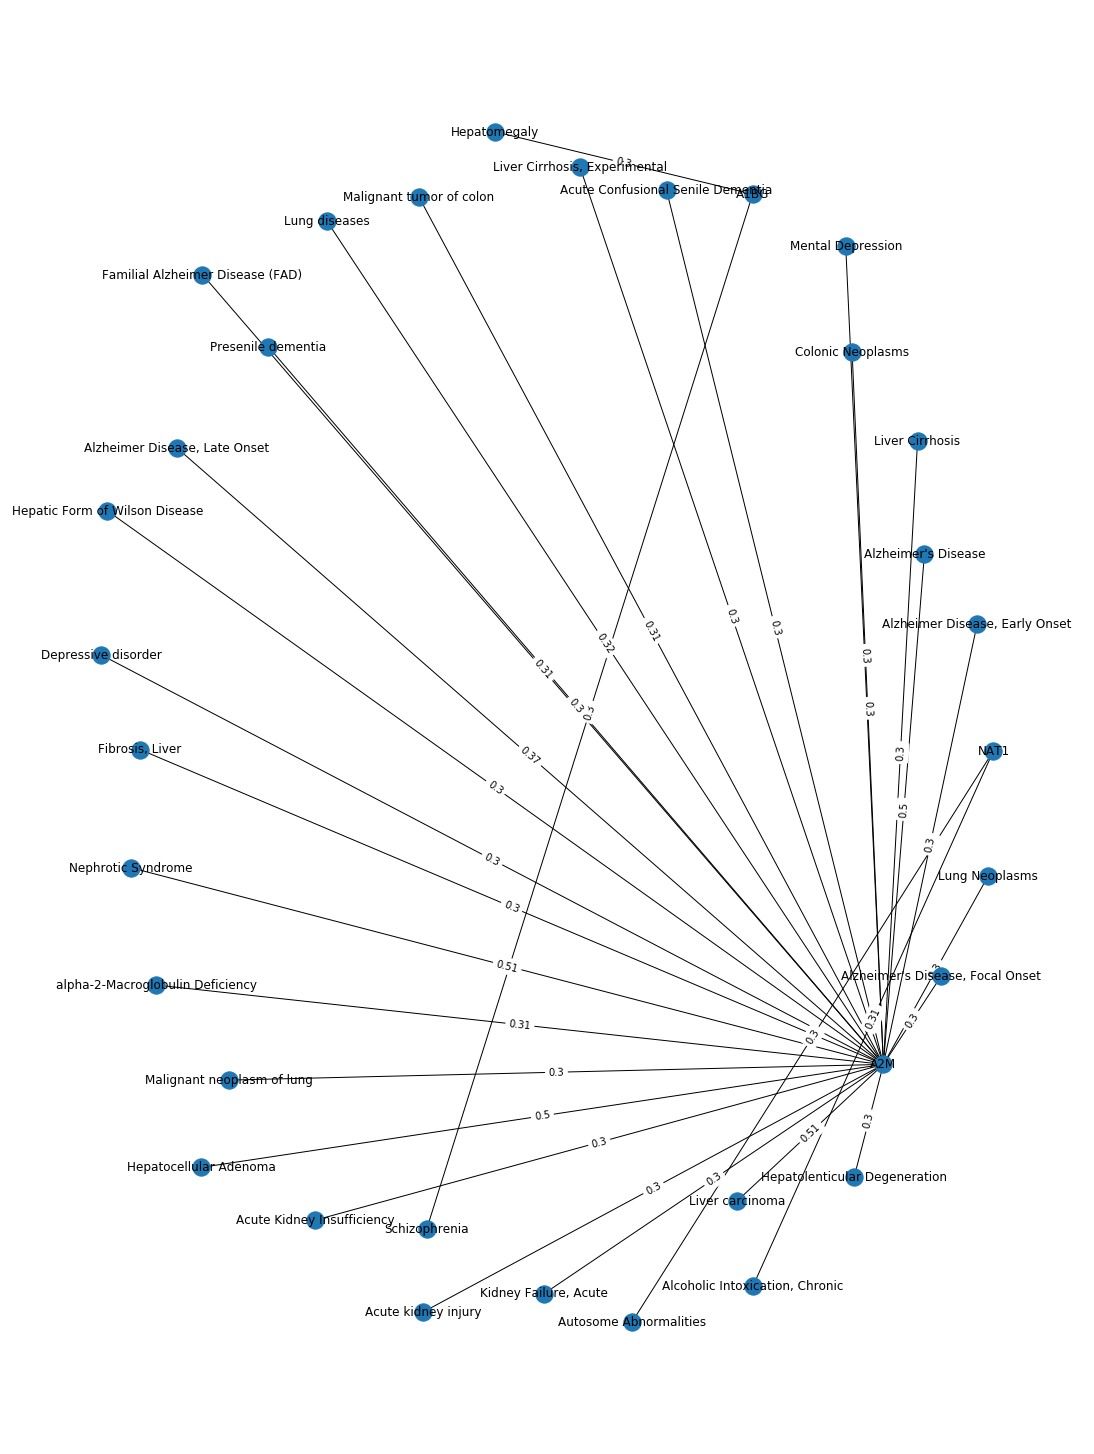

In [22]:
figure(figsize=(15, 20))
pos = nx.spring_layout(G, k=10)  # For better example looking
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['score'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [23]:
dataf.rename(columns = {'geneSymbol':'gene_name'}, inplace = True)
dataf

,gene_name,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [24]:
Finaldf=pd.merge(dataframe, dataf, on = "gene_name")

In [25]:
Finaldf

,gene_name,drug_name,interaction_group_score,diseaseName,score
0,VDR,NIFEKALANT,0.14,"Osteoporosis, Age-Related",0.30
1,VDR,NIFEKALANT,0.14,Alopecia,0.50
2,VDR,NIFEKALANT,0.14,Bipolar Disorder,0.31
3,VDR,NIFEKALANT,0.14,Malignant neoplasm of breast,0.40
4,VDR,NIFEKALANT,0.14,Malignant Neoplasms,0.40
...,...,...,...,...,...
2019485,LNPEP,TOSEDOSTAT,3.35,Memory impairment,0.30
2019486,LNPEP,TOSEDOSTAT,3.35,Age-Related Memory Disorders,0.30
2019487,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Semantic",0.30
2019488,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Spatial",0.30


In [26]:
Finaldf.sort_values('gene_name')

,gene_name,drug_name,interaction_group_score,diseaseName,score
2019376,A2M,THROMBIN,5.30,Malignant neoplasm of lung,0.30
2019385,A2M,THROMBIN,5.30,Acute kidney injury,0.30
2019384,A2M,THROMBIN,5.30,Liver carcinoma,0.51
2019383,A2M,THROMBIN,5.30,Acute Kidney Insufficiency,0.30
2019382,A2M,THROMBIN,5.30,Hepatic Form of Wilson Disease,0.30
...,...,...,...,...,...
2016598,ZNF804A,LITHIUM,2.77,Colorectal Carcinoma,0.30
2016597,ZNF804A,LITHIUM,2.77,Renal Cell Carcinoma,0.30
2016596,ZNF804A,LITHIUM,2.77,Bipolar Disorder,0.50
2016606,ZNF804A,LITHIUM,2.77,Substance-Related Disorders,0.30


In [27]:
Finaldf['globalScore']=Finaldf['score']*Finaldf['interaction_group_score']
Finaldf

,gene_name,drug_name,interaction_group_score,diseaseName,score,globalScore
0,VDR,NIFEKALANT,0.14,"Osteoporosis, Age-Related",0.30,0.0420
1,VDR,NIFEKALANT,0.14,Alopecia,0.50,0.0700
2,VDR,NIFEKALANT,0.14,Bipolar Disorder,0.31,0.0434
3,VDR,NIFEKALANT,0.14,Malignant neoplasm of breast,0.40,0.0560
4,VDR,NIFEKALANT,0.14,Malignant Neoplasms,0.40,0.0560
...,...,...,...,...,...,...
2019485,LNPEP,TOSEDOSTAT,3.35,Memory impairment,0.30,1.0050
2019486,LNPEP,TOSEDOSTAT,3.35,Age-Related Memory Disorders,0.30,1.0050
2019487,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Semantic",0.30,1.0050
2019488,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Spatial",0.30,1.0050


In [28]:
finalDf=Finaldf[['diseaseName','drug_name','globalScore']]
finalDf

,diseaseName,drug_name,globalScore
0,"Osteoporosis, Age-Related",NIFEKALANT,0.0420
1,Alopecia,NIFEKALANT,0.0700
2,Bipolar Disorder,NIFEKALANT,0.0434
3,Malignant neoplasm of breast,NIFEKALANT,0.0560
4,Malignant Neoplasms,NIFEKALANT,0.0560
...,...,...,...
2019485,Memory impairment,TOSEDOSTAT,1.0050
2019486,Age-Related Memory Disorders,TOSEDOSTAT,1.0050
2019487,"Memory Disorder, Semantic",TOSEDOSTAT,1.0050
2019488,"Memory Disorder, Spatial",TOSEDOSTAT,1.0050


In [29]:
G = nx.from_pandas_edgelist(finalDf[:30], source='diseaseName', target='drug_name',edge_attr= 'globalScore')

In [30]:
# Give the graph a name
G.name = 'Disease & drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Disease & drug Interactions Network' with 31 nodes and 30 edges
Network density: 0.06451612903225806


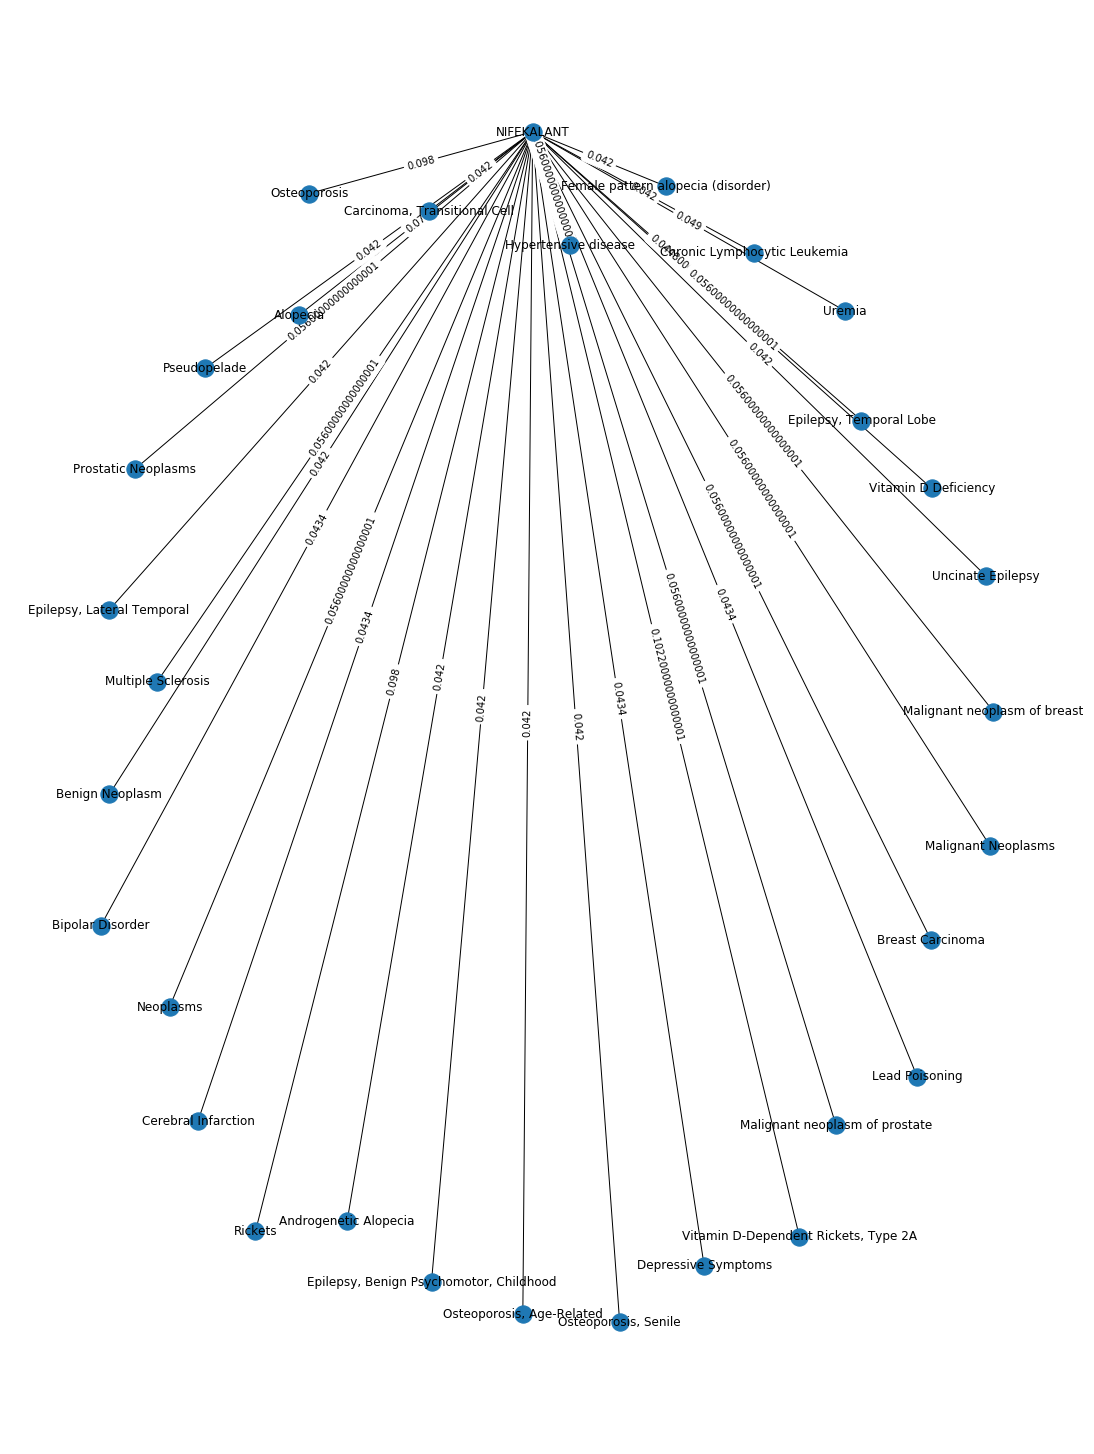

In [31]:
figure(figsize=(15, 20))
pos = nx.spring_layout(G, k=10)  # For better example looking
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['globalScore'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [33]:
class GCNLayer(nn.Module):

    def __init__(self, c_in, c_out):
        super().__init__()
        self.projection = nn.Linear(c_in, c_out)

    def forward(self, node_feats, adj_matrix):
                
        # Num neighbours = number of incoming edges
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.projection(node_feats)
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours
        return node_feats

In [32]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix

<31x31 sparse matrix of type '<class 'numpy.intc'>'
	with 60 stored elements in Compressed Sparse Row format>

In [34]:
node_feats = torch.arange(8, dtype=torch.float32).view(1, 4, 2)
node_feats

tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])

In [ ]:
layer = GCNLayer(c_in=2, c_out=2)
layer.projection.weight.data = torch.Tensor([[1., 0.], [0., 1.]])
layer.projection.bias.data = torch.Tensor([0., 0.])

with torch.no_grad():
    out_feats = layer(node_feats, adj_matrix)